In [26]:
#necessary Imports

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [34]:
#reading the metadata file from csv
df = pd.read_csv('../assets/bib_enteries.csv').iloc[:, 1:]

In [35]:
df['year'] = df['year'].astype(str)

In [36]:
#getting the list of top 6 paper type
top_6 = df['paper_type'].value_counts().keys()[:8]


def fix_low_count_paper_type(paper_type):
    if paper_type in top_6:
        return paper_type
    else:
        return "others"
    

#applying transformation
df['paper_type'] = df['paper_type'].apply(lambda x: fix_low_count_paper_type(x))

In [39]:
paper_type_freq = df['paper_type'].value_counts()

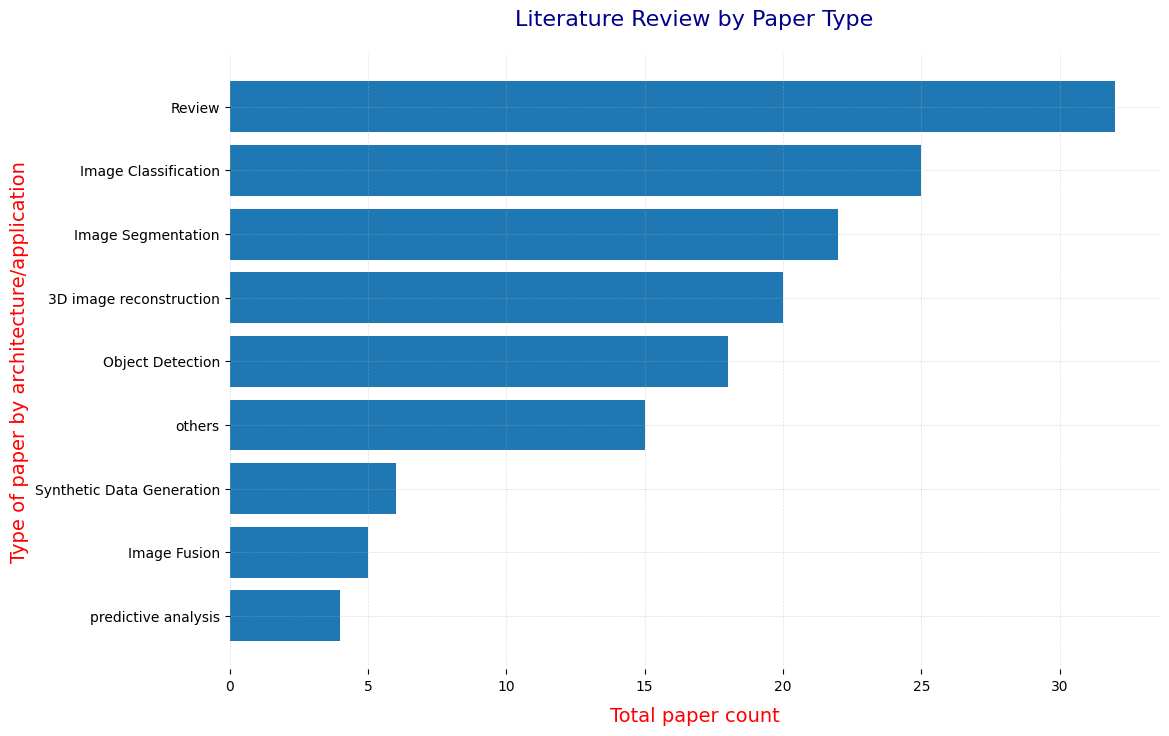

In [91]:
plt.figure(figsize=(12,8))
plt.ylabel("Type of paper by architecture/application", fontsize = 14, color = 'red')
plt.xlabel("Total paper count", fontsize = 14, color = 'red', labelpad=10)
plt.title("Literature Review by Paper Type", fontsize = 16, color = 'darkblue', loc = 'center', pad = 20)
plt.barh(paper_type_freq.index, paper_type_freq.values)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.4)

plt.gca().invert_yaxis()

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

# footnote = "Others include less common types of papers not specifically categorized."
# plt.figtext(1,1,footnote, wrap=False, horizontalalignment='right', fontsize=12, color='gray')

# Display the plot

plt.savefig('../assets/paper_type_count.png', format='png', dpi = 300,bbox_inches='tight')
plt.show()
